In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
switches = pd.read_csv("/hpc/umc_laat/gvandersluis/data/Ont_data_nhung/HG002/OMIM_ROI/Haploblock_switches.csv")

switches['Accuracy_float'] = (
    switches['Accuracy']
    .str.rstrip('%')
    .astype(float)
)

In [3]:
switches#[switches["chromosome"] == "chrY"]

,PS_tag,START_HB,END_HB,informative_variants,chromosome,QUAL_mean,GENES_in_HB,HB_length,total_VARS,het_variants0,all_switches,all_switch_rate,all_switchflips,all_switchflip_rate,blockwise_hamming_rate,Accuracy,Accuracy_float
0,100011198,100011198,100057044,4,chr2,58.462500,['AFF3'],45846,7,5.0,0.0,0.000000,0/0,0.000000,0.000000,100.0%,100.000000
1,100030138,100030138,100065861,2,chr10,47.985000,['DNMBP-CPN1' 'CPN1'],35723,57,2.0,0.0,0.000000,0/0,0.000000,0.000000,100.0%,100.000000
2,1000552,1000552,1079306,28,chr1,48.257857,['HES4' 'AGRN' 'RNF223'],78754,354,5.0,0.0,0.000000,0/0,0.000000,0.000000,100.0%,100.000000
3,10006481,10006481,10452054,480,chr2,57.991021,['LOC107985852' 'LOC112268412' 'LOC101929882' ...,445573,1035,563.0,0.0,0.000000,0/0,0.000000,0.000000,100.0%,100.000000
4,100086706,100086706,101321726,1075,chr7,54.605972,['ZNF3' 'COPS6' 'MIR25' 'AP4M1' 'TAF6' 'MBLAC1...,1235020,2348,935.0,2.0,0.003509,2/0,0.003509,0.003503,99.99649737302977%,99.996497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4454,99888013,99888013,99888332,7,chr7,53.655714,['TRIM4'],319,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4455,99926797,99926797,100035133,7,chr7,59.488571,['LOC101927610' 'GJC3-AZGP1' 'AZGP1P1' 'LOC105...,108336,133,7.0,0.0,0.000000,0/0,0.000000,0.000000,100.0%,100.000000
4456,99950376,99950376,100070404,20,chr13,58.137000,['LOC101927437' 'ZIC2' 'LINC00554-NDUFA12P1' '...,120028,153,28.0,0.0,0.000000,0/0,0.000000,0.000000,100.0%,100.000000
4457,99970670,99970670,99973046,2,chr4,62.120000,['H2AZ1-DT'],2376,2,2.0,0.0,0.000000,0/0,0.000000,0.000000,100.0%,100.000000


In [4]:
max(switches["all_switches"])

6.0

Text(0, 0.5, 'count')

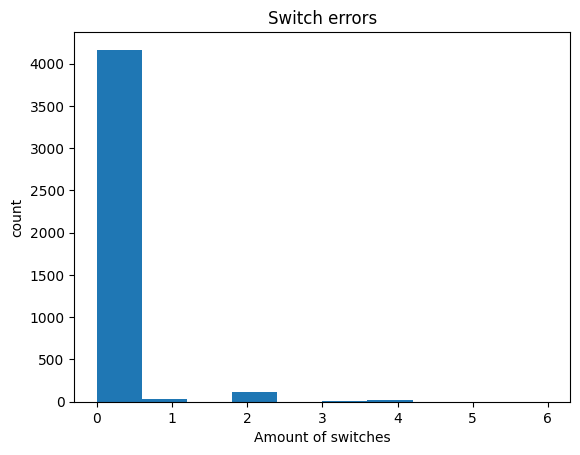

In [5]:
plt.hist(switches["all_switches"])
plt.title("Switch errors")
plt.xlabel("Amount of switches")
plt.ylabel("count")

Text(0, 0.5, 'count')

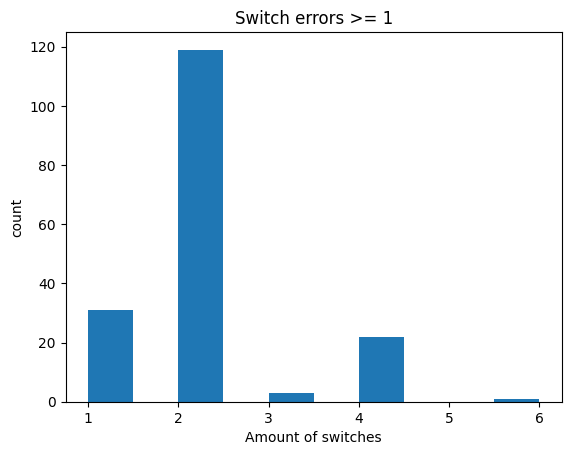

In [6]:
df = switches[switches["all_switches"] >= 1]

plt.hist(df["all_switches"])
plt.title("Switch errors >= 1")
plt.xlabel("Amount of switches")
plt.ylabel("count")

Text(0, 0.5, 'Count')

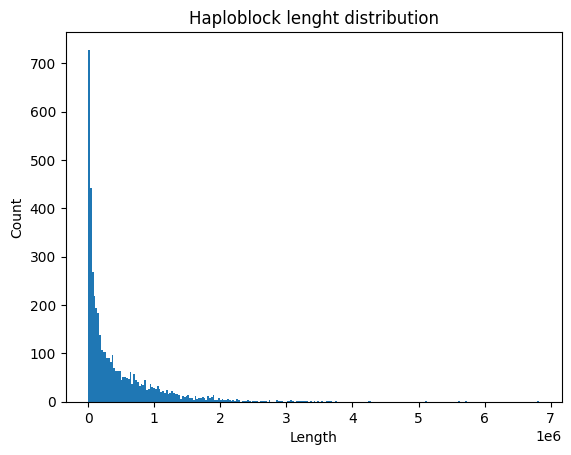

In [7]:
plt.hist(switches["HB_length"], bins = 250)
plt.title("Haploblock lenght distribution")
plt.xlabel("Length")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

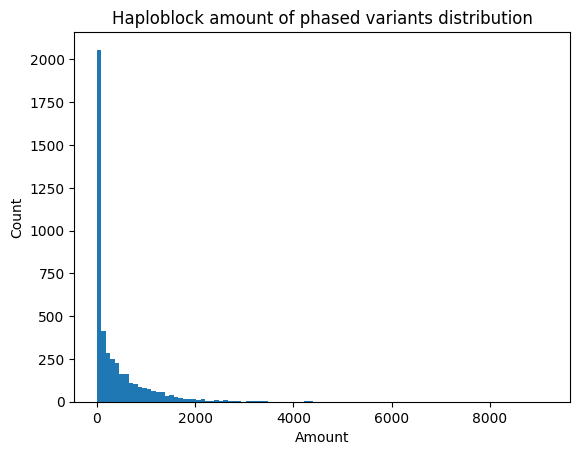

In [20]:
plt.hist(switches["informative_variants"], bins = 100)
plt.title("Haploblock amount of phased variants distribution")
plt.xlabel("Amount")
plt.ylabel("Count")

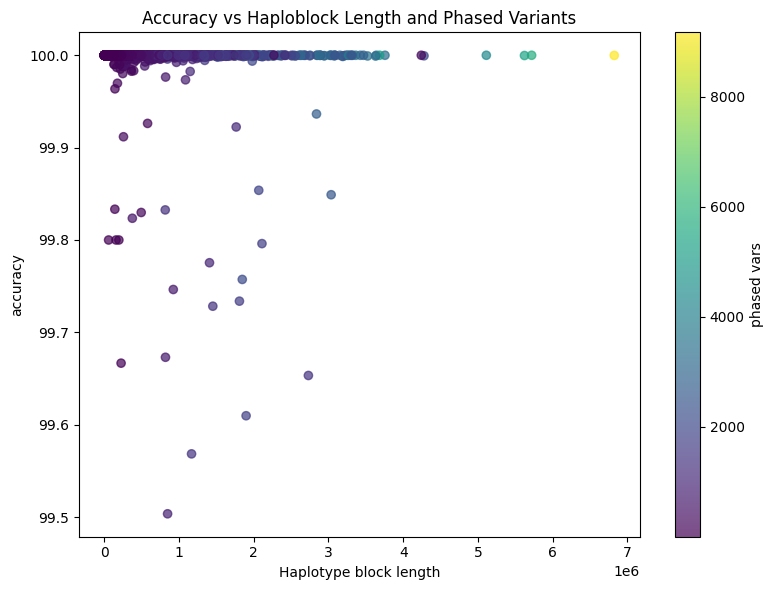

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
df = switches
# If Accuracy is a string like "99.99%", convert it to float
df['Accuracy_float'] = (
    df['Accuracy']
    .str.rstrip('%')
    .astype(float)
)

plt.figure(figsize=(8, 6))

sc = plt.scatter(
    df['HB_length'],
    df['Accuracy_float'],
    c=df['informative_variants'],
    cmap='viridis',
    alpha=0.7
)

plt.xlabel('Haplotype block length')
plt.ylabel('accuracy')
plt.title('Accuracy vs Haploblock Length and Phased Variants')

cbar = plt.colorbar(sc)
cbar.set_label('phased vars')

plt.tight_layout()
plt.show()


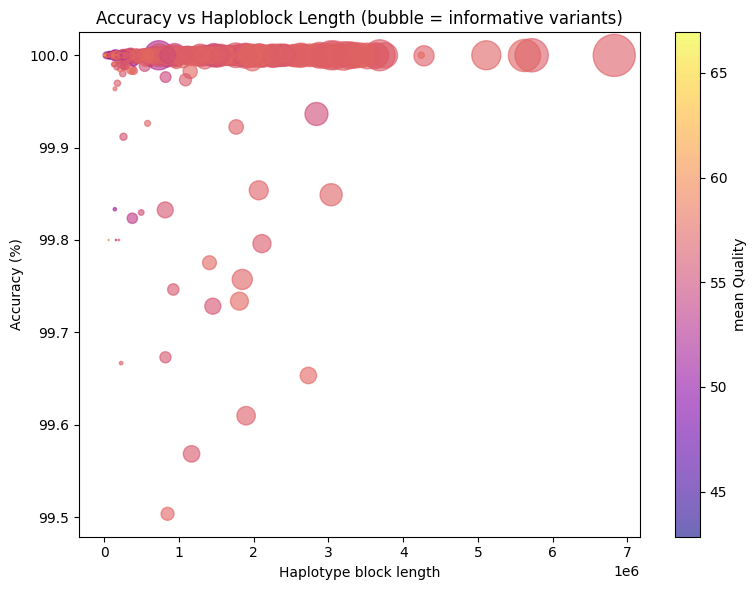

In [9]:
plt.figure(figsize=(8, 6))
df = switches
plt.scatter(
    df['HB_length'],
    df['Accuracy_float'],
    s=df['informative_variants'] * 0.1,  # scale size
    c=df['QUAL_mean'],
    cmap='plasma',
    alpha=0.6
)

plt.xlabel('Haplotype block length')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs Haploblock Length (bubble = informative variants)')

plt.colorbar(label='mean Quality')
plt.tight_layout()
plt.show()


/hpc/umc_laat/gvandersluis/software/miniforge3/envs/NIPD/lib/python3.14/site-packages/seaborn/axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/hpc/umc_laat/gvandersluis/software/miniforge3/envs/NIPD/lib/python3.14/site-packages/seaborn/axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


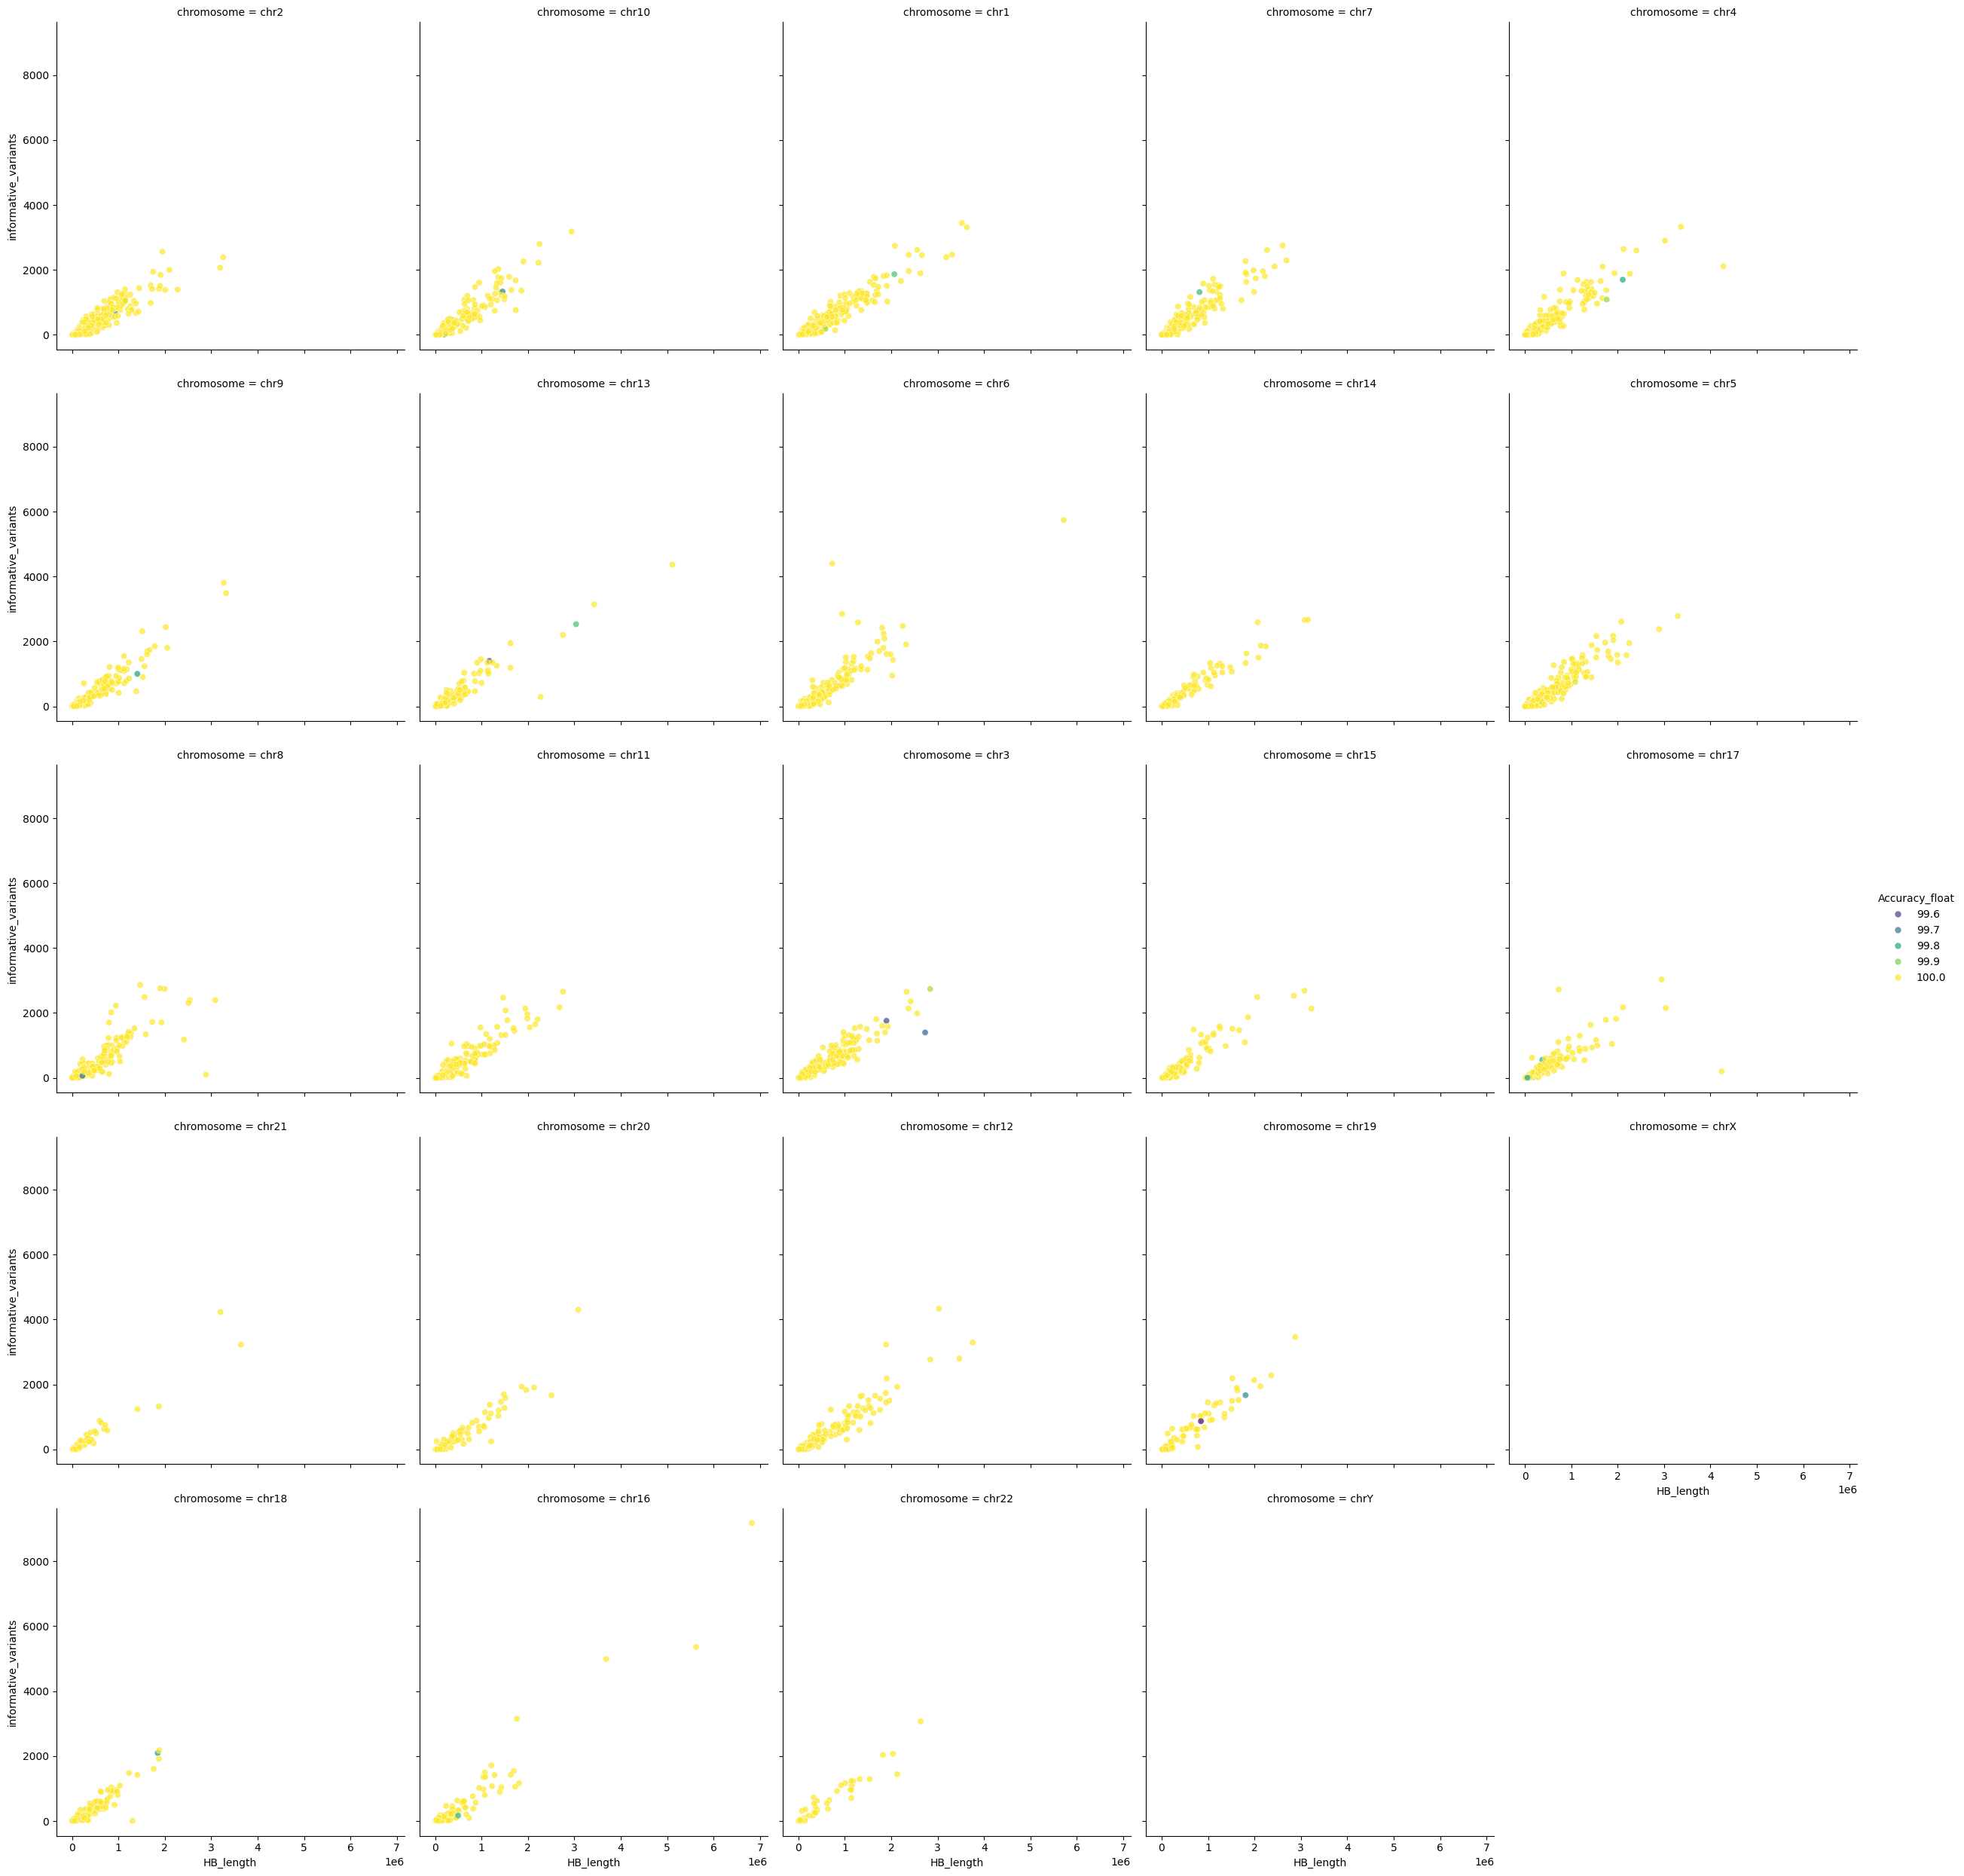

In [10]:
df = switches
import seaborn as sns

df['Accuracy_float'] = (
    df['Accuracy']
    .str.rstrip('%')
    .astype(float)
)


sns.relplot(
    data=df,
    x='HB_length',
    y='informative_variants',
    hue='Accuracy_float',
    col='chromosome',
    col_wrap=5,
    palette='viridis',
    alpha=0.7,
    kind='scatter'
)


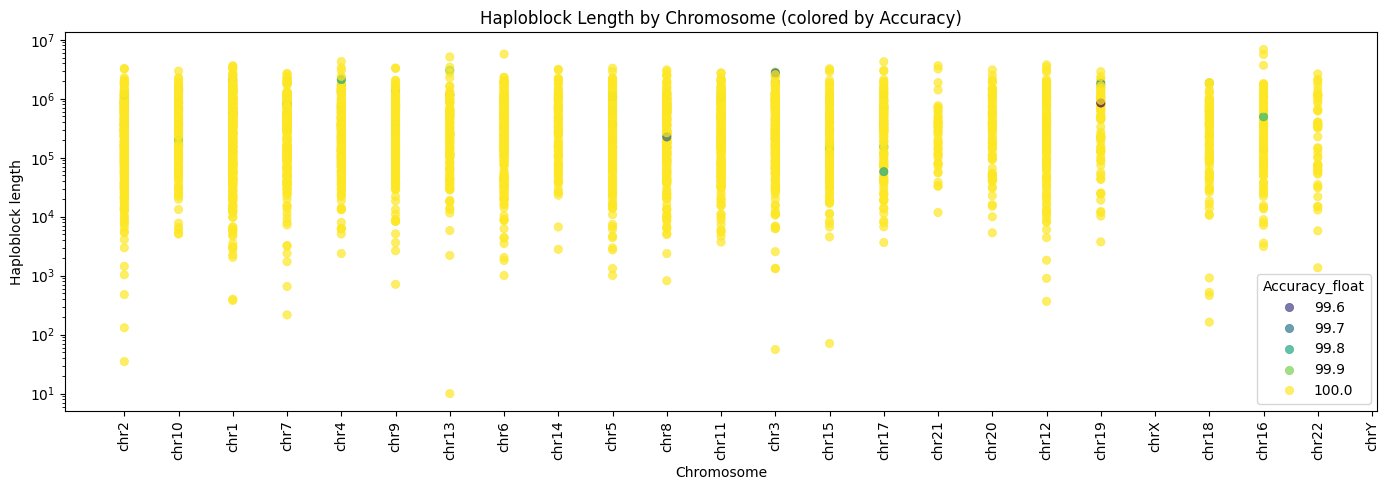

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
df = switches
plt.figure(figsize=(14, 5))

sns.scatterplot( # maak er een boxplot van
    data=df,
    x='chromosome',
    y='HB_length',
    hue='Accuracy_float',
    palette='viridis',
    alpha=0.7,
    edgecolor=None
)

plt.yscale('log')
plt.xlabel('Chromosome')
plt.ylabel('Haploblock length')
plt.title('Haploblock Length by Chromosome (colored by Accuracy)')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


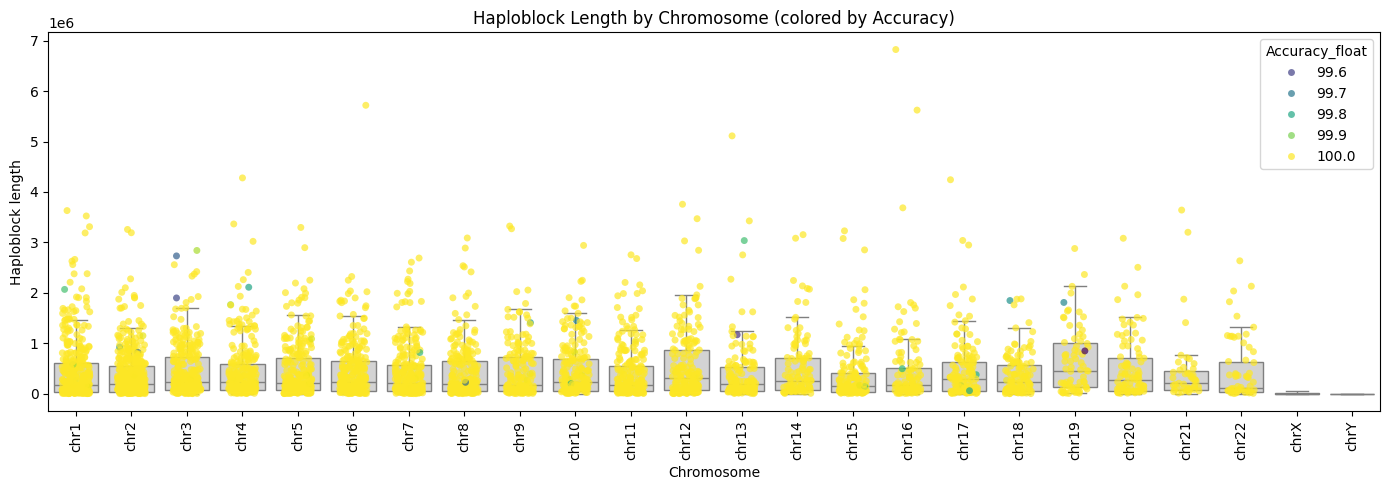

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

df = switches
chrom_order = [f'chr{i}' for i in range(1, 23)] + ['chrX', 'chrY']

plt.figure(figsize=(14, 5))

# Boxplot
sns.boxplot(
    data=df,
    x='chromosome',
    y='HB_length',
    order=chrom_order,
    color='lightgray',
    showfliers=False
)

# Scatter (jittered points on top)
sns.stripplot(
    data=df,
    x='chromosome',
    y='HB_length',
    order=chrom_order,
    hue='Accuracy_float',
    palette='viridis',
    jitter=0.25,
    alpha=0.7,
    dodge=False
)

#plt.yscale('log')
plt.xlabel('Chromosome')
plt.ylabel('Haploblock length')
plt.title('Haploblock Length by Chromosome (colored by Accuracy)')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


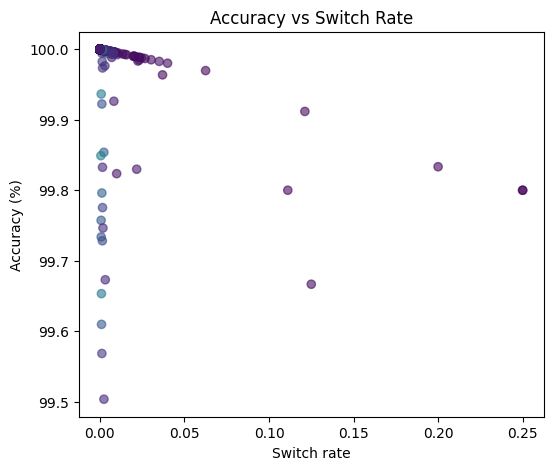

In [41]:
# plt.figure(figsize=(8, 6))

# sc = plt.scatter(
#     df['HB_length'],
#     df['Accuracy_float'],
#     c=df['informative_variants'],
#     cmap='viridis',
#     alpha=0.7
# )

# plt.xlabel('Haplotype block length')
# plt.ylabel('accuracy')
# plt.title('Accuracy vs Haploblock Length and Informative Variants')

# cbar = plt.colorbar(sc)
# cbar.set_label('phased vars')

# plt.tight_layout()
# plt.show()



df = switches
df['Accuracy_float'] = (
    df['Accuracy']
    .str.rstrip('%')
    .astype(float)
)


plt.figure(figsize=(6,5))
plt.scatter(
    df['all_switch_rate'],
    df['Accuracy_float'],
    c=df['HB_length'],
    alpha=0.6
)
plt.xlabel('Switch rate')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs Switch Rate')
plt.show()
